<a href="https://colab.research.google.com/github/vn322/RUDN_Lab_Works/blob/main/SQL_lab_5_2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Методы**

In [ ]:
import sqlite3 as sq

with sq.connect("cars.db") as con:
    cur = con.cursor()

    cur.execute("""CREATE TABLE IF NOT EXISTS cars (
        car_id INTEGER PRIMARY KEY AUTOINCREMENT,
        model TEXT,
        price INTEGER
    )""")



    Когда контекстный менеджер завершает свою работу, он автоматически выполняет два метода:

con.commit() – применение всех изменений в таблицах БД;

con.close() – закрытие соединения с БД.
# Это необходимые действия для сохранения внесенных изменений в БД.


дабавим несколько записей

In [ ]:
cur.execute("INSERT INTO cars VALUES(1,'Audi',52642)")

cur.execute("INSERT INTO cars VALUES(2,'Mercedes',57127)")

cur.execute("INSERT INTO cars VALUES(3,'Skoda',9000)")

cur.execute("INSERT INTO cars VALUES(4,'Volvo',29000)")

cur.execute("INSERT INTO cars VALUES(5,'Bentley',350000)")

# Если данные хранятся в каких-либо коллекциях, например, так:

In [ ]:
cars = [
    ('Audi', 52642),
    ('Mercedes', 57127),
    ('Skoda', 9000),
    ('Volvo', 29000),
    ('Bentley', 350000)
]

весь набор ранее приведенных запросов, можно заменить циклом:

for car in cars:
    cur.execute("INSERT INTO cars VALUES(NULL, ?, ?)", car)

Здесь вместо знаков вопроса будут подставлены соответствующие данные из первого кортежа списка

Или, воспользоваться методом executemany, который специально для этого и существует:

cur.executemany("INSERT INTO cars VALUES(NULL, ?, ?)", cars)

помимо знаков вопроса можно использовать именованные параметры (плейсхолдеры). Для этого в запросе перед ними ставится двоеточие, а затем, указывается словарь, где имя – это ключ, вместо которого будет подставлено его значение:


cur.execute("UPDATE cars SET price = :Price WHERE model LIKE 'A%'", {'Price': 0})

выполнить несколько отдельных SQL-команд

cur.executescript("""DELETE FROM cars WHERE model LIKE 'A%'; UPDATE cars SET price = price+1000 """)

# **commit и rollback**

In [1]:
import sqlite3 as sq
con = None

try:

    con = sq.connect("cars.db")
    cur = con.cursor()

    cur.executescript("""CREATE TABLE IF NOT EXISTS cars (
            car_id INTEGER PRIMARY KEY AUTOINCREMENT,
            model TEXT,
            price INTEGER
        );
        BEGIN;
        INSERT INTO cars VALUES(NULL,'Audi',52642);
        INSERT INTO cars VALUES(NULL,'Mercedes',57127);
        INSERT INTO cars VALUES(NULL,'Skoda',9000);
        INSERT INTO cars VALUES(NULL,'Volvo',29000);
        INSERT INTO cars VALUES(NULL,'Bentley',350000);
        UPDATE cars SET price = price+1000
    """)
    con.commit()

except sq.Error as e:
    if con: con.rollback()
    print("Ошибка выполнения запроса")
finally:
    if con: con.close()



здесь сами вызываем методы commit и close. Если операции с таблицами прошли успешно, то они будут сохранены, если же возникли какие-либо ошибки (исключения), то будет вызван метод rollback, который откатывает состояние БД в состояние отметки BEGIN, то есть, все внесенные изменения применены не будут.


In [ ]:
#в команде UDPATE неверное имя таблицы:
UPDATE cars2 SET price = price+1000


import sqlite3 as sq

with sq.connect("cars.db") as con:
    cur = con.cursor()

    cur.execute("""CREATE TABLE IF NOT EXISTS cars (
        car_id INTEGER PRIMARY KEY AUTOINCREMENT,
        model TEXT,
        price INTEGER
    )""")

    Когда контекстный менеджер завершает свою работу, он автоматически выполняет два метода:

con.commit() – применение всех изменений в таблицах БД;

con.close() – закрытие соединения с БД.
Это необходимые действия для сохранения внесенных изменений в БД.


Если операции с таблицами прошли успешно, то они будут сохранены, если же возникли какие-либо ошибки (исключения), то будет вызван метод rollback, который откатывает состояние БД в состояние отметки BEGIN, то есть, все внесенные изменения применены не будут.

Если при работе с БД предполагается сохранять вносимые изменения сразу после выполнения SQL-запроса, то это можно сделать с помощью метода connect, установив в нем параметр isolation_level=None:


with sq.connect("cars.db", isolation_level=None) as con:
    cur = con.cursor()

    cur.executescript("""INSERT INTO cars VALUES(NULL,'Audi',52642);
        INSERT INTO cars VALUES(NULL,'Mercedes',57127);
        INSERT INTO cars VALUES(NULL,'Skoda',9000);
        INSERT INTO cars VALUES(NULL,'Volvo',29000);
        INSERT INTO cars VALUES(NULL,'Bentley',350000);
    """)

Однако так делать без особой надобности не стоит, т.к. это уменьшает скорость работы с БД из-за постоянной записи данных непосредственно в файл. Без изменения этого параметра все изменения сохраняются в памяти, а потому работа происходит куда быстрее.

**Задание 6**

создайте таблицу cars с полями car_id (первичный ключ) model и price
вставьте в нее несклоько записей из списка


cars = [
    ('KAMAZ КОМПАС', 32642),
    ('Лада Президент', 5154),
    ('Москвич пасфаиндер', 3000)
]


Продемонстируйте работу команд commit и rollback

In [2]:
import sqlite3 as sq
con = None
cars = [ ('KAMAZ КОМПАС', 32642), ('Лада Президент', 5154), ('Москвич пасфаиндер', 3000) ]
try:

    con = sq.connect("cars.db")
    cur = con.cursor()

    cur.executescript("""CREATE TABLE IF NOT EXISTS cars (
            car_id INTEGER PRIMARY KEY AUTOINCREMENT,
            model TEXT,
            price INTEGER
        );   """)
    cur.executemany("INSERT INTO cars VALUES(NULL,?, ?)", cars)
    con.commit()

except sq.Error as e:
    if con: con.rollback()
    print("Ошибка выполнения запроса")
finally:
    if con: con.close()



In [4]:
with sq.connect("cars.db") as con:
    cur = con.cursor()# запрос на выборку записей:
cur.execute("SELECT model, price FROM cars")
#после формирования выборки сам экземпляр класса Cursor можно
#использовать как итерируемый объект и выбирать записи в цикле:
for result in cur:
    print(result)

('KAMAZ КОМПАС', 32642)
('Лада Президент', 5154)
('Москвич пасфаиндер', 3000)


**Свойство lastrowid**

1) создать еще одну таблицу cust, которая содержит покупателей машин.

2) если происходит покупка по «trade-in», то прежняя машина владельца добавляется в конец таблицы cars, а в таблице cust появляется запись с именем покупателя, идентификатором машины сданной в «trade-in» и id новой купленной машины.

In [ ]:
with sq.connect("cars.db") as con:
    cur = con.cursor()

    cur.executescript("""CREATE TABLE IF NOT EXISTS cars (
            car_id INTEGER PRIMARY KEY AUTOINCREMENT,
            model TEXT,
            price INTEGER
        );
        CREATE TABLE IF NOT EXISTS cust(name TEXT, tr_in INTEGER, buy INTEGER);
    """)

    cur.execute("INSERT INTO cars VALUES(NULL,'Запорожец', 1000)")

Таблица cust с тремя полями

Надо добавить в таблицу cars автомобиль «Запорожец», который сдает покупатель Федор по trade-in.
Как теперь узнать car_id этой записи? Для этого можно воспользоваться специальным свойством:

last_row_id = cur.lastrowid

которое содержит значение rowid последней добавленной записи. В нашем случае поля car_id и rowid будут совпадать

buy_car_id = 2

cur.execute("INSERT INTO cust VALUES('Федор', ?, ?)", (last_row_id, buy_car_id))

при выполнении программы в таблице cust появиться запись.

**функционал API для работы с СУБД SQLite.**


*   fetchall() – возвращает число записей в виде упорядоченного списка;
*   fetchmany(size) – возвращает число записей не более size;
*   fetchone() – возвращает первую запись.

In [ ]:
import sqlite3 as sq

cars = [
    ('Audi', 52642),
    ('Mercedes', 57127),
    ('Skoda', 9000),
    ('Volvo', 29000),
    ('Bentley', 350000)
]

with sq.connect("cars.db") as con:
    cur = con.cursor()

    cur.executescript("""CREATE TABLE IF NOT EXISTS cars (
            car_id INTEGER PRIMARY KEY AUTOINCREMENT,
            model TEXT,
            price INTEGER)
    """)

    cur.executemany("INSERT INTO cars VALUES(NULL,?, ?)", cars)

In [ ]:
# запрос на выборку записей:
cur.execute("SELECT model, price FROM cars")
# получить доступ к сформированной выборке
rows = cur.fetchall()
print(rows)

[('Audi', 53642), ('Mercedes', 58127), ('Skoda', 10000), ('Volvo', 30000), ('Bentley', 351000), ('Запорожец', 1000), ('Audi', 52642), ('Mercedes', 57127), ('Skoda', 9000), ('Volvo', 29000), ('Bentley', 350000)]


In [ ]:
# запрос на выборку записей:
cur.execute("SELECT model, price FROM cars")
rows = cur.fetchone()
print(rows)

('Audi', 53642)


In [ ]:
# запрос на выборку записей:
cur.execute("SELECT model, price FROM cars")
rows = cur.fetchmany(4)
print(rows)

[('Audi', 53642), ('Mercedes', 58127), ('Skoda', 10000), ('Volvo', 30000)]


In [ ]:
# запрос на выборку записей:
cur.execute("SELECT model, price FROM cars")
#после формирования выборки сам экземпляр класса Cursor можно
#использовать как итерируемый объект и выбирать записи в цикле:
for result in cur:
    print(result)

('Audi', 53642)
('Mercedes', 58127)
('Skoda', 10000)
('Volvo', 30000)
('Bentley', 351000)
('Запорожец', 1000)
('Audi', 52642)
('Mercedes', 57127)
('Skoda', 9000)
('Volvo', 29000)
('Bentley', 350000)


Преимущество такого подхода в экономии памяти при большом числе записей в выборке. Здесь на каждой итерации цикла мы выбираем только одну следующую запись, а не храним их сразу целиком в памяти в виде списка. Это часто бывает эффективно и очень удобно.

Далее, иногда более предпочтительным вариантом выходных данных является не кортеж с данными, а словарь, позволяющий обращаться к элементам по именам полей. Для этого после установления соединения с БД следует прописать вот такую строчку:

con.row_factory = sq.Row

еперь, при выполнении программы увидим, что переменная result в цикле ссылается на объект Row, а не кортеж:

<sqlite3.Row object at 0x00000185B226B8B0>

И через этот объект доступ к данным осуществляется с помощью имен полей таблицы cars:

print(result['model'], result['price'])

12.11.22

**Хранение изображений в БД**

специальный тип данных BLOB

In [ ]:
cur.executescript("""CREATE TABLE IF NOT EXISTS users (
    name TEXT,
    ava BLOB,
    score INTEGER)
""")

In [ ]:
#функция считывания изображения из файла
def readAva(n): #номер аватарки
    try:
        with open(f"avas/{n}.png", "rb") as f:
            return f.read()
    except IOError as e:
        print(e)
        return False

#возвратит набор двоичных данных, иначе значение False

In [ ]:
img = readAva(1)
if img:
    binary = sq.Binary(img) # преобразование

    cur.execute("INSERT INTO users VALUES ('Николай', ?, 1000)", (binary,))

In [ ]:
#прочитаем изображение из этого поля
cur.execute("SELECT ava FROM users LIMIT 1")

In [ ]:
# с помощью метода fetchone обратимся к первой записи и возьмем данные из поля ava:
img = cur.fetchone()['ava']

In [ ]:
#сохраним его в файл
def writeAva(name, data):
    try:
        with open(name, "wb") as f:
            f.write(data)
    except IOError as e:
        print(e)
        return False

    return True

In [ ]:
writeAva("out.png", img)

**Создание бэкапа БД**
iterdump()

In [ ]:
with sq.connect("cars.db") as con:
    cur = con.cursor()

    for sql in con.iterdump():
        print(sql)

In [ ]:
#сохраним все эти строчки в отдельном файле:

    with open("sql_damp.sql", "w") as f:
        for sql in con.iterdump():
            f.write(sql)

In [ ]:
 #чтобы восстановить БД с помощью этого файла можно воспользоваться методом executescript, о котором мы уже говорили:

    with open("sql_damp.sql", "r") as f:
        sql = f.read()
        cur.executescript(sql)

**Создание БД в памяти**

sq.connect(':memory:')

In [ ]:
data = [("car", "машина"), ("house", "дом"), ("tree", "дерево"), ("color", "цвет")]

con = sq.connect(':memory:')
with con:
    cur = con.cursor()
    cur.execute("""CREATE TABLE IF NOT EXISTS dict(
        eng TEXT, rus TEXT
    )""")

    cur.executemany("INSERT INTO dict VALUES(?,?)", data)

    cur.execute("SELECT rus FROM dict WHERE eng LIKE 'c%'")
    print(cur.fetchall())

Что будет результатом?

Задание 1:

Спроектируйте и реализуйте базу данных

1)студентов (фио. др. и номер студбилета)

2)группы(назвние)

3)предметы (название, к-во часов) которые они изучают

4)вид контроля (экзамен, зачет-рейтинг и кр)

5)оценка по предмету с датой проставления полученная конкретным студентом.

In [ ]:
import sqlite3 as sq

students = [
    ('Andi', 2001, 52642,1),
    ('Maria', 2002, 57127,1),
    ('Sam', 2001,90020,1),
    ('Vova', 2003, 29000,2),
    ('Ben', 2000, 35000,2)
]

with sq.connect("uni.db") as con:
    cur = con.cursor()

    cur.executescript("""CREATE TABLE IF NOT EXISTS students (
            stud_id INTEGER PRIMARY KEY AUTOINCREMENT,
            name TEXT,
            year INTEGER,
            bilet INTEGER,
            group_id INTEGER)
    """)

    cur.executemany("INSERT INTO students VALUES(NULL,?, ?, ?,?)", students)

In [ ]:
cur.execute("SELECT * FROM students")
#после формирования выборки сам экземпляр класса Cursor можно
#использовать как итерируемый объект и выбирать записи в цикле:
for result in cur:
    print(result)

(1, 'Andi', 2001, 52642, 1)
(2, 'Maria', 2002, 57127, 1)
(3, 'Sam', 2001, 90020, 1)
(4, 'Vova', 2003, 29000, 2)
(5, 'Ben', 2000, 35000, 2)


In [ ]:
import sqlite3 as sq

groups = [
    (1,'Mathematics'),
    (2,'Informatics'),

]

with sq.connect("uni.db") as con:
    cur = con.cursor()

    cur.executescript("""CREATE TABLE IF NOT EXISTS groups (
            group_id INTEGER PRIMARY KEY AUTOINCREMENT,
            name TEXT)
    """)

    cur.executemany("INSERT INTO groups VALUES(?, ?)", groups)

In [ ]:
cur.execute("SELECT * FROM groups")
#после формирования выборки сам экземпляр класса Cursor можно
#использовать как итерируемый объект и выбирать записи в цикле:
for result in cur:
    print(result)

(1, 'Mathematics')
(2, 'Informatics')


In [ ]:
import sqlite3 as sq

subject = [
    ('Math', 100),
    ('Info', 80),
    ('Physic', 50),

]

with sq.connect("uni.db") as con:
    cur = con.cursor()

    cur.executescript("""CREATE TABLE IF NOT EXISTS subject (
            subject_id INTEGER PRIMARY KEY AUTOINCREMENT,
            subject TEXT,
            hour INTEGER)
    """)

    cur.executemany("INSERT INTO subject VALUES(NULL,?, ?)", subject)

In [ ]:
cur.execute("SELECT * FROM subject")
#после формирования выборки сам экземпляр класса Cursor можно
#использовать как итерируемый объект и выбирать записи в цикле:
for result in cur:
    print(result)

(1, 'Math', 100)
(2, 'Info', 80)
(3, 'Physic', 50)


In [ ]:
import sqlite3 as sq

control = [
    (1,'Exam'),
    (2,'Zachet'),
    (3,'Test')
]

with sq.connect("uni.db") as con:
    cur = con.cursor()

    cur.executescript("""CREATE TABLE IF NOT EXISTS control (
            control_id INTEGER PRIMARY KEY AUTOINCREMENT,
            art TEXT)
    """)

    cur.executemany("INSERT INTO control VALUES(?,?)", control)

In [ ]:
cur.execute("SELECT * FROM control")
#после формирования выборки сам экземпляр класса Cursor можно
#использовать как итерируемый объект и выбирать записи в цикле:
for result in cur:
    print(result)

(1, 'Exam')
(2, 'Zachet')
(3, 'Test')


In [ ]:
import sqlite3 as sq

value = [
    (1, 1, '2024-5-7',5),
    (1, 2, '2024-6-7',4),
    (3, 3,'2024-5-17',3),
    (2, 1, '2024-5-27',4),
    (5, 2, '2024-6-1',3)]

with sq.connect("uni.db") as con:
    cur = con.cursor()

    cur.executescript("""CREATE TABLE IF NOT EXISTS value (
            val_id INTEGER PRIMARY KEY AUTOINCREMENT,
            stud_id INTEGER,
            subject_id INTEGER,
            date TEXT,
            value INTEGER)
    """)

    cur.executemany("INSERT INTO value VALUES(NULL,?, ?,?,?)", value)

In [ ]:
cur.execute("SELECT * FROM value")
#после формирования выборки сам экземпляр класса Cursor можно
#использовать как итерируемый объект и выбирать записи в цикле:
for result in cur:
    print(result)

(1, 1, 1, '2024-5-7', 5)
(2, 1, 2, '2024-6-7', 4)
(3, 3, 3, '2024-5-17', 3)
(4, 2, 1, '2024-5-27', 4)
(5, 2, 2, '2024-6-1', 3)
(6, 1, 1, '2024-5-7', 5)
(7, 1, 2, '2024-6-7', 4)
(8, 3, 3, '2024-5-17', 3)
(9, 2, 1, '2024-5-27', 4)
(10, 2, 2, '2024-6-1', 3)
(11, 1, 1, '2024-5-7', 5)
(12, 1, 2, '2024-6-7', 4)
(13, 3, 3, '2024-5-17', 3)
(14, 2, 1, '2024-5-27', 4)
(15, 5, 2, '2024-6-1', 3)


Задание 2:

создайте таблици связей между этими 5ю таблицами
Заполните эти таблицы

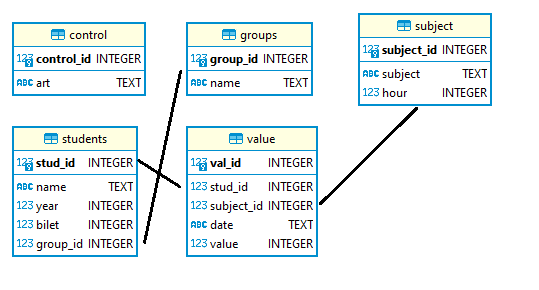

Задание 3:

Напишите запрос, который покзыает самого (или самых, если их несколько) полохи студентов каждой группе

In [ ]:
import sqlite3

# Устанавливаем соединение с базой данных
connection = sqlite3.connect('uni.db')
cursor = connection.cursor()

# Выбираем всех
cursor.execute("SELECT students.name, min(value.value), students.group_id FROM students JOIN value ON students.stud_id = value.stud_id GROUP BY students.group_id")
users = cursor.fetchall()

# Выводим результаты
for name in users:
  print(name)

# Закрываем соединениеimport sqlite3

# Закрываем соединение
connection.close()

('Sam', 3, 1)
('Ben', 3, 2)


Задание 4:
Создайте бекап этой базы данных

In [ ]:
with sq.connect("uni.db") as con:
    cur = con.cursor()

    for sql in con.iterdump():
        print(sql)

BEGIN TRANSACTION;
CREATE TABLE control (
            control_id INTEGER PRIMARY KEY AUTOINCREMENT,
            art TEXT);
INSERT INTO "control" VALUES(1,'Exam');
INSERT INTO "control" VALUES(2,'Zachet');
INSERT INTO "control" VALUES(3,'Test');
CREATE TABLE groups (
            group_id INTEGER PRIMARY KEY AUTOINCREMENT,
            name TEXT);
INSERT INTO "groups" VALUES(1,'Mathematics');
INSERT INTO "groups" VALUES(2,'Informatics');
CREATE TABLE students (
            stud_id INTEGER PRIMARY KEY AUTOINCREMENT,
            name TEXT,
            year INTEGER,
            bilet INTEGER,
            group_id INTEGER);
INSERT INTO "students" VALUES(1,'Andi',2001,52642,1);
INSERT INTO "students" VALUES(2,'Maria',2002,57127,1);
INSERT INTO "students" VALUES(3,'Sam',2001,90020,1);
INSERT INTO "students" VALUES(4,'Vova',2003,29000,2);
INSERT INTO "students" VALUES(5,'Ben',2000,35000,2);
CREATE TABLE subject (
            subject_id INTEGER PRIMARY KEY AUTOINCREMENT,
            subject TEXT,

In [ ]:
#сохраним все эти строчки в отдельном файле:

with open("sql_damp.sql", "w") as f:
    for sql in con.iterdump():
         f.write(sql)

Задание 5:

Удалите все таблици и восстановите их из бекапа

In [ ]:
with sq.connect("uni.db") as con:
    cur = con.cursor()

In [ ]:
 #чтобы восстановить БД с помощью этого файла можно воспользоваться методом executescript, о котором мы уже говорили:

with open("sql_damp.sql", "r") as f:
     sql = f.read()
     cur.executescript(sql)